In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [ ]:
train

In [ ]:
test

In [ ]:
plt.scatter(train['Survived'].values,train['Fare'].values)

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
train.describe()

#  Cleaning the Data

In [ ]:
#Deleting useless columns
train = train.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis = 1)
test = test.drop(columns=['PassengerId','Name', 'Cabin','Ticket'], axis = 1)

In [ ]:
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')

In [ ]:
# fill  na data
train.fillna(train.Age.median(), inplace=True)
test.fillna(train.Age.median(), inplace=True)

In [ ]:
# some fature engineer  to build a more meaniful feature
# With this we can analyse the influence of having family of who has in titanic
train['hasFamily'] = ((train.Parch + train.SibSp)>0)*1
test['hasFamily'] = (test.Parch + train.SibSp > 0) *1

In [ ]:
train = train.drop(columns=['Parch', 'SibSp'], axis = 1)
test = test.drop(columns=['Parch', 'SibSp'], axis = 1)

In [ ]:
train['Age'] = train['Age'].apply(lambda x:  filter_age(x))

In [ ]:
train.info()

In [ ]:
test.info()

# Data Analysis

In [ ]:
train.hist(bins =50 , figsize= (20,15))
plt.show()

<AxesSubplot:xlabel='Sex'>

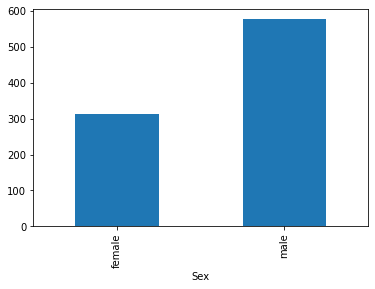

In [423]:
# survilance analysis by gender

by_gender = train.groupby(['Sex']).count()['Survived']

by_gender.plot(kind='bar', )


In [424]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [425]:
def filter_age(x):
    if x < 1:
        return 0
    else:
         return x

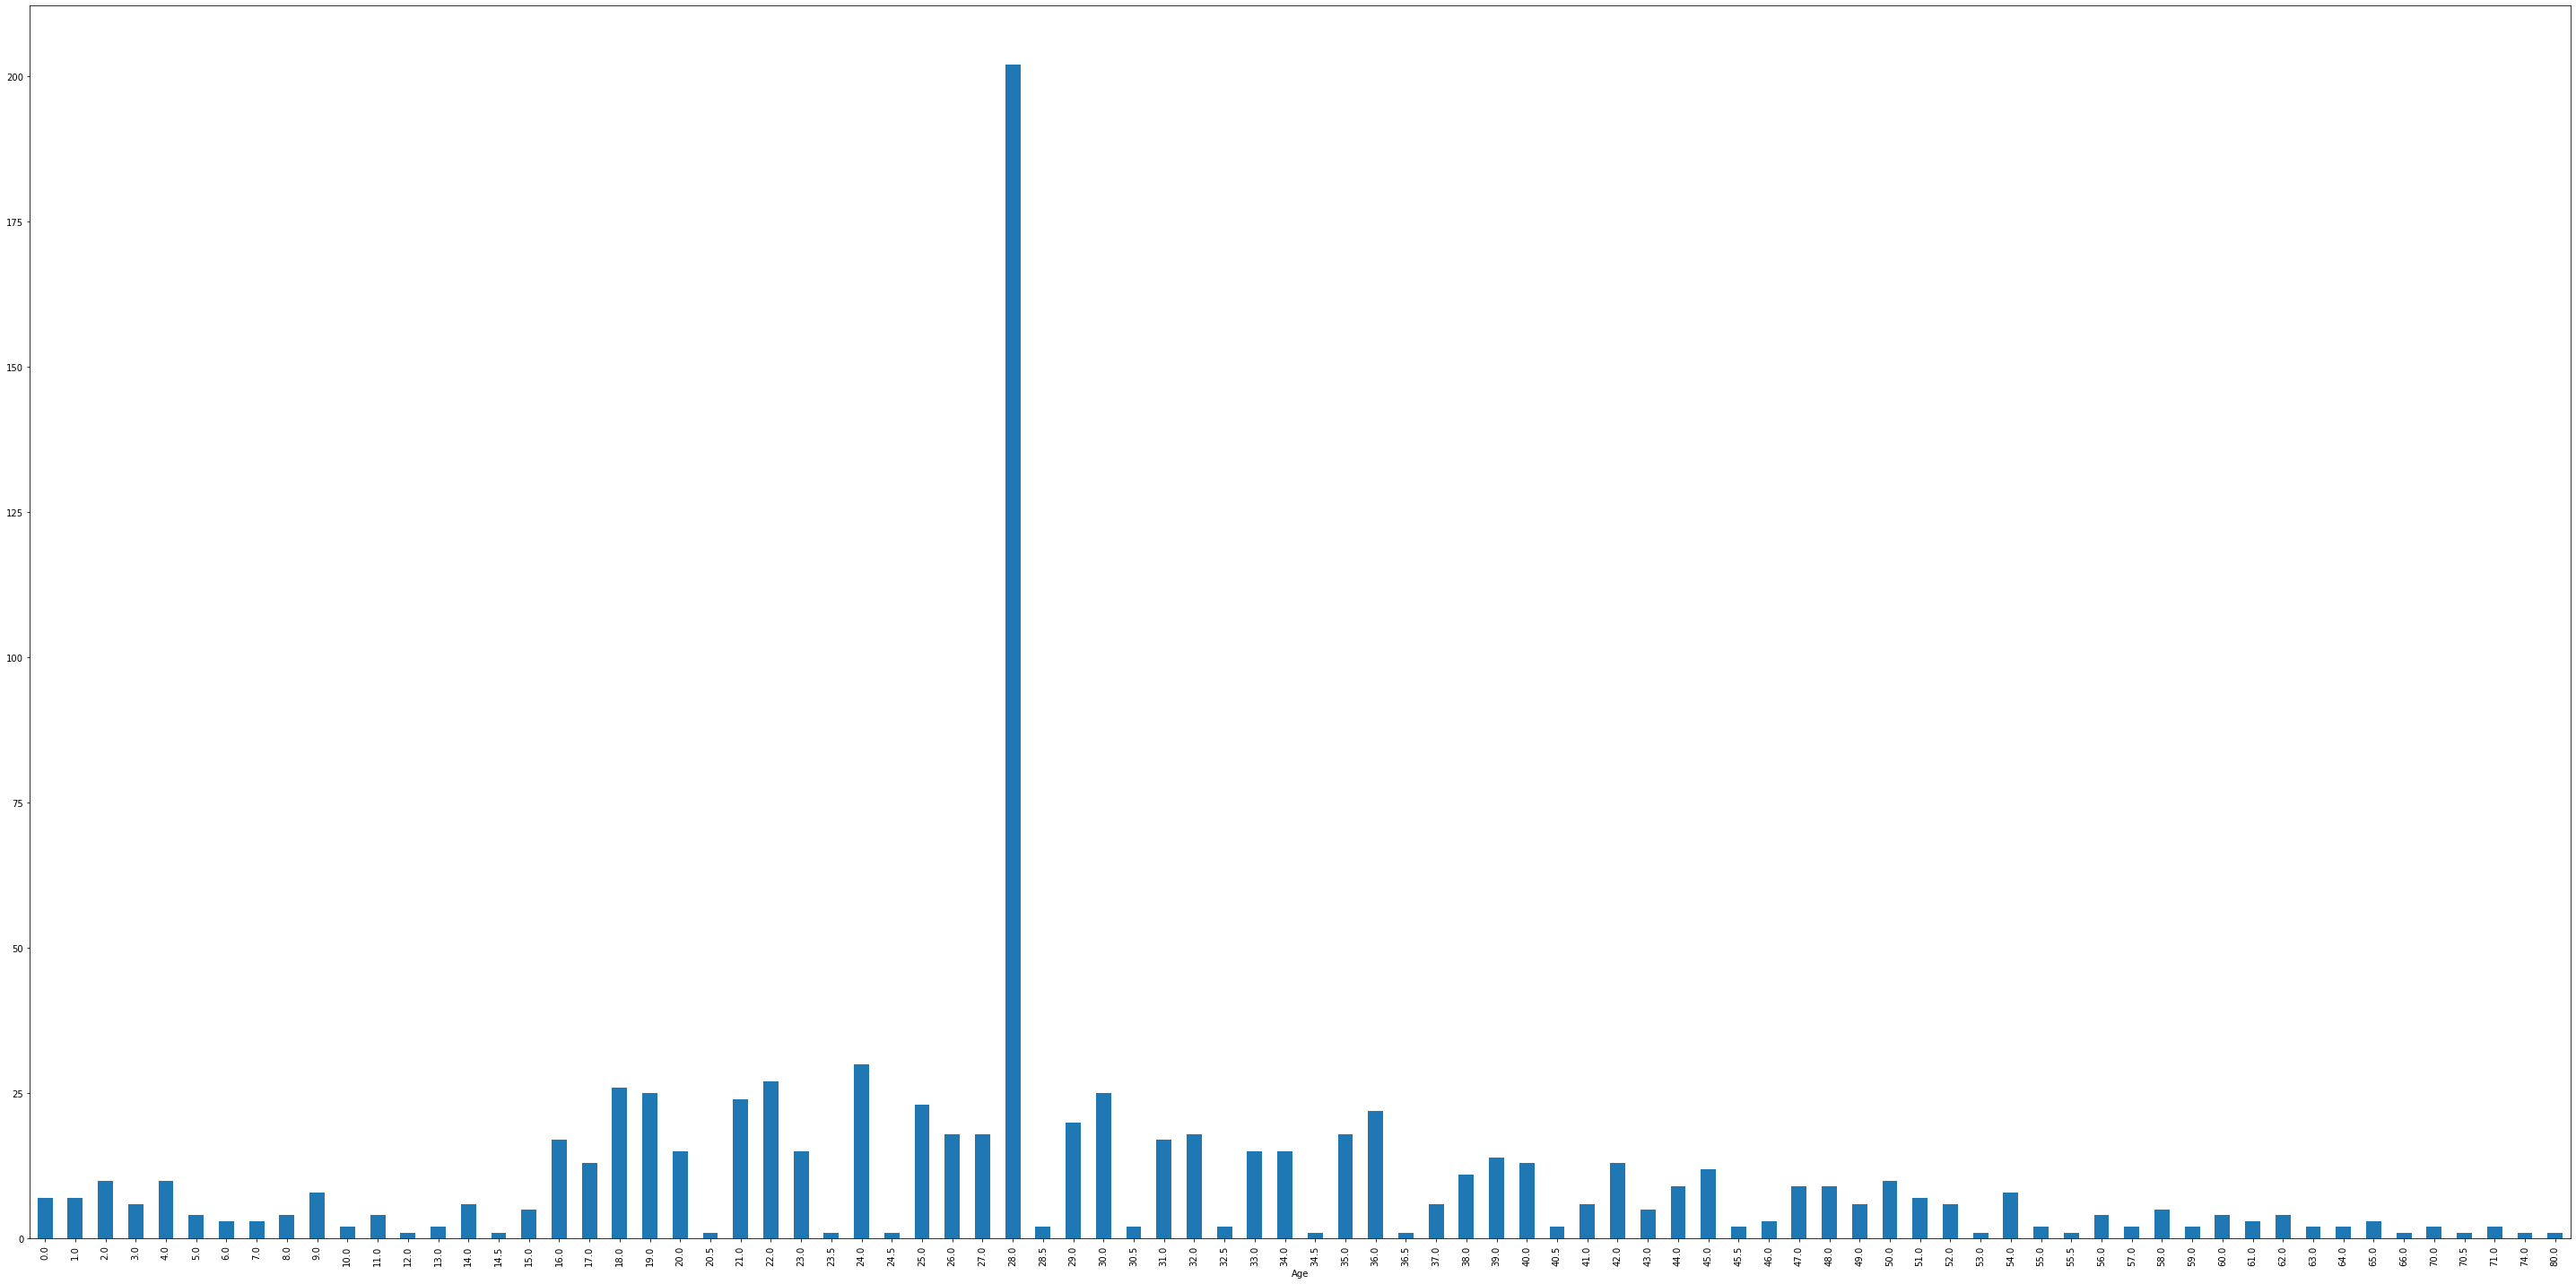

In [426]:
# survilance analysis by age

by_age =train.groupby(['Age']).count()["Survived"]
plt.figure(figsize=(40,20))
by_age.plot(kind='bar')
plt.tight_layout()

In [427]:
train['Age'].value_counts()

28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
       ... 
66.0      1
14.5      1
20.5      1
55.5      1
74.0      1
Name: Age, Length: 84, dtype: int64

<AxesSubplot:xlabel='Pclass'>

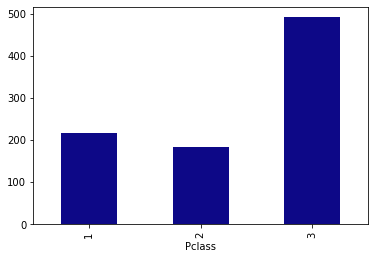

In [428]:
# survilance analysis by classs
by_class =train.groupby(['Pclass']).count()["Survived"]
by_class.plot(kind='bar', colormap='plasma')

In [429]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='hasFamily'>

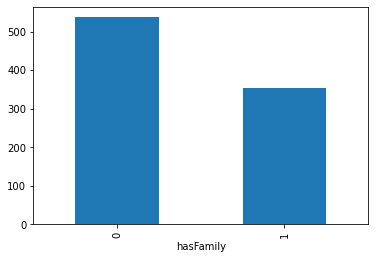

In [430]:
# by family
by_family = train.groupby(by='hasFamily').count()['Survived']
by_family.plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

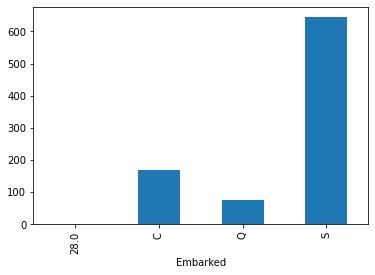

In [431]:
# by  embarked gate
by_family = train.groupby(by='Embarked').count()['Survived']
by_family.plot(kind='bar')

In [432]:
train['Embarked'].value_counts()

S       644
C       168
Q        77
28.0      2
Name: Embarked, dtype: int64

In [433]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'hasFamily'], dtype='object')

In [434]:
# before training the model we need  encode non-numerical fetures
from sklearn.preprocessing import OneHotEncoder

sexDummies_train = pd.get_dummies(train.Sex, prefix='Sex')
embarkedDummies_train = pd.get_dummies(train.Embarked, prefix='Embarked')
sexDummies_test = pd.get_dummies(test.Sex, prefix='Sex')
embarkedDummies_test = pd.get_dummies(test.Embarked, prefix='Embarked')


train = pd.concat([train,sexDummies_train,embarkedDummies_train], axis=1)
test = pd.concat([test,sexDummies_test,embarkedDummies_test], axis=1)


In [435]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'hasFamily',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [436]:
# We don't need  Embarked and Sex columns anymore, let's get rid of them
train.drop(columns=['Sex','Embarked'], inplace=True)
test.drop(columns=['Sex','Embarked'], inplace = True)

# Training and evaluating models

In [437]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [438]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [441]:
X_train = train.drop(columns='Survived')
y_train = train['Survived']
X_test = test.dropna()

In [442]:

dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [443]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   hasFamily   891 non-null    int32  
 4   Sex_female  418 non-null    float64
 5   Sex_male    418 non-null    float64
 6   Embarked_C  418 non-null    float64
 7   Embarked_Q  418 non-null    float64
 8   Embarked_S  418 non-null    float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 59.3 KB
